# EXPLORATION 04
# 멋진 작사가 만들기


- Writier : 송영석
- Date : 2021.10.10
 

- 목적 
의미있는 내용의 가사를 작성 할 수 있어야 하므로 적당한 길이의 가사와 의미없거나 짧은 sentence들은 전처리 과정에서 제거해준다.



In [1]:
import os, re 
import numpy as np
import tensorflow as tf
import seaborn as sns
import glob
import os
import pandas as pd

## 1. 데이터 전처리를 위한 분석
 ### * 문장의 길이를 파악해 추가적으로 전처리
 ### * [,{,( 등의 기호가 들어간 문장 과감히 삭제

In [34]:
txt_file_path = os.getenv('HOME')+'/aiffel/lyricist/data/lyrics/*'

txt_list = glob.glob(txt_file_path)

raw_corpus = []

# 여러개의 txt 파일을 모두 읽어서 raw_corpus 에 담습니다.
for txt_file in txt_list:
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)

print("데이터 크기:", len(raw_corpus))
for i in raw_corpus[:30]:
    print(i)


데이터 크기: 187088
 There must be some kind of way outta here
Said the joker to the thief
There's too much confusion
I can't get no relief Business men, they drink my wine
Plowman dig my earth
None were level on the mind
Nobody up at his word
Hey, hey No reason to get excited
The thief he kindly spoke
There are many here among us
Who feel that life is but a joke
But, uh, but you and I, we've been through that
And this is not our fate
So let us stop talkin' falsely now
The hour's getting late, hey All along the watchtower
Princes kept the view
While all the women came and went
Barefoot servants, too
Outside in the cold distance
A wildcat did growl
Two riders were approaching
And the wind began to howl [Intro]
Hey Joe
Where you going with that gun in your hand?
Hey Joe
I said where you going with that gun in your hand? [Verse 1]
I'm going down to shoot my old lady
You know, I caught her messing around with another man
I'm going down to shoot my old lady
You know, I caught her messing around 

 ### * DataFrame 이용하여 문장 길이별 분포 확인   
  - 15 길이까지는 아직 의미 있는 문장으로 보이고 10 부터는 의미가 없어보여서 삭제

In [3]:

lyr = pd.DataFrame(data = raw_corpus,columns = ['lyrics'])
lyr["length"] = lyr["lyrics"].apply(lambda i:len(i))    
lyr.head()

,lyrics,length
0,There must be some kind of way outta here,42
1,Said the joker to the thief,27
2,There's too much confusion,26
3,"I can't get no relief Business men, they drink...",54
4,Plowman dig my earth,20


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,lyrics,length
22,Hey Joe,7
24,Hey Joe,7
31,Hey Joe,7
34,Hey Joe,7
54,Alright,7
62,Hey Joe,7
65,"Hey Joe, uh",11
73,Help me,7
75,"Ooo, ahhh",9
76,"Ooo, ahhh",9


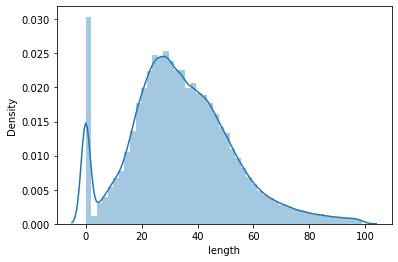

In [4]:
lyr_copy = lyr.copy()

lyr_copy = lyr_copy[lyr_copy.length <100] 
sns.distplot(lyr_copy['length'] , label = "Lyrics_length")

lyr_copy = lyr_copy[lyr_copy.length <15]
lyr_copy.head(30)

In [5]:
lyr_copy = lyr_copy[lyr_copy.length <10]
lyr_copy.head(30)

,lyrics,length
22,Hey Joe,7
24,Hey Joe,7
31,Hey Joe,7
34,Hey Joe,7
54,Alright,7
62,Hey Joe,7
73,Help me,7
75,"Ooo, ahhh",9
76,"Ooo, ahhh",9
81,Help me,7


## 2. 데이터 정제

In [6]:
# 입력된 문장을
#     1. 소문자로 바꾸고, 양쪽 공백을 지웁니다
#     2. 특수문자 양쪽에 공백을 넣고
#     3. 여러개의 공백은 하나의 공백으로 바꿉니다
#     4. a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꿉니다
#     5. 다시 양쪽 공백을 지웁니다
#     6. 문장 시작에는 <start>, 끝에는 <end>를 추가합니다
# 이 순서로 처리해주면 문제가 되는 상황을 방지할 수 있겠네요!
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

# 이 문장이 어떻게 필터링되는지 확인해 보세요.
print(preprocess_sentence("This @_is ;;;sample        sentence."))

<start> this is sample sentence . <end>


### 문장의 길이, ({[- 등의 기호를 포함한 문장을 삭제 

In [7]:
corpus = []

if raw_corpus[21].find(']') != -1:
    print("exist")
else:
    print("no")
      
for sentence in raw_corpus:
    # 우리가 원하지 않는 문장은 건너뜁니다
    
    if len(sentence) < 10: continue
    if sentence.find('{') != -1:continue
    if sentence.find('[') != -1:continue  
    if sentence.find('(') != -1:continue   
    if sentence.find('-') != -1:continue
    # 정제를 하고 담아주세요
    preprocessed_sentence = preprocess_sentence(sentence)
    corpus.append(preprocessed_sentence)
        
# 정제된 결과를 10개만 확인해보죠
print(len(corpus))
corpus[:40]


exist
156078


['<start> there must be some kind of way outta here <end>',
 '<start> said the joker to the thief <end>',
 '<start> there s too much confusion <end>',
 '<start> i can t get no relief business men , they drink my wine <end>',
 '<start> plowman dig my earth <end>',
 '<start> none were level on the mind <end>',
 '<start> nobody up at his word <end>',
 '<start> hey , hey no reason to get excited <end>',
 '<start> the thief he kindly spoke <end>',
 '<start> there are many here among us <end>',
 '<start> who feel that life is but a joke <end>',
 '<start> but , uh , but you and i , we ve been through that <end>',
 '<start> and this is not our fate <end>',
 '<start> so let us stop talkin falsely now <end>',
 '<start> the hour s getting late , hey all along the watchtower <end>',
 '<start> princes kept the view <end>',
 '<start> while all the women came and went <end>',
 '<start> barefoot servants , too <end>',
 '<start> outside in the cold distance <end>',
 '<start> a wildcat did growl <end>',

In [8]:
def tokenize(corpus):
    # 12000단어를 기억할 수 있는 tokenizer를 만들겁니다
    # 우리는 이미 문장을 정제했으니 filters가 필요없어요
    # 12000단어에 포함되지 못한 단어는 '<unk>'로 바꿀거에요
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=12000, 
        filters=' ',
        oov_token="<unk>"
    )
    
    # corpus를 이용해 tokenizer 내부의 단어장을 완성합니다
    tokenizer.fit_on_texts(corpus)
    # 준비한 tokenizer를 이용해 corpus를 Tensor로 변환합니다
    tensor = tokenizer.texts_to_sequences(corpus)   
    
    # 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다
    # 만약 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다.
    # 문장 앞에 패딩을 붙여 길이를 맞추고 싶다면 padding='pre'를 사용합니다
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post',maxlen=15)  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)
tensor.shape

[[  2  63 278 ...   0   0   0]
 [  2 110   6 ...   0   0   0]
 [  2  63  17 ...   0   0   0]
 ...
 [  2  73  43 ...   3   0   0]
 [  2  58   4 ...   0   0   0]
 [  2  13 656 ...   0   0   0]] <keras_preprocessing.text.Tokenizer object at 0x7f47b3b54a50>


(156078, 15)

## 3. 평가 데이터셋 분리

In [13]:
# tensor에서 마지막 토큰을 잘라내서 소스 문장을 생성합니다
# 마지막 토큰은 <end>가 아니라 <pad>일 가능성이 높습니다.
src_input = tensor[:, :-1]  
# tensor에서 <start>를 잘라내서 타겟 문장을 생성합니다.
tgt_input = tensor[:, 1:]    

print(src_input[0])
print(tgt_input[0])

[  2  63 278  28  95 523  19  84 767  94   3   0   0   0]
[ 63 278  28  95 523  19  84 767  94   3   0   0   0   0]


In [14]:
from sklearn.model_selection import train_test_split
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, tgt_input, test_size=0.2, random_state=20)
print("Source Train:", enc_train.shape)  # (124960, 14)  # 현재 (124981, 14)
print("Target Train:", dec_train.shape)  # (124960, 14)


Source Train: (124862, 14)
Target Train: (124862, 14)


In [15]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

 # tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0:<pad>를 포함하여 7001개
VOCAB_SIZE = tokenizer.num_words + 1   

# 준비한 데이터 소스로부터 데이터셋을 만듭니다
# 데이터셋에 대해서는 아래 문서를 참고하세요
# 자세히 알아둘수록 도움이 많이 되는 중요한 문서입니다
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((256, 14), (256, 14)), types: (tf.int32, tf.int32)>

## 4.인공지능 학습시키기

In [20]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out


### model_1  
embedding_size = 256  
hidden_size = 1024

In [21]:
embedding_size = 256
hidden_size = 1024
model_1 = TextGenerator(VOCAB_SIZE, embedding_size , hidden_size)

In [22]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model_1(src_sample)

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[ 8.46847797e-06, -6.49428112e-05,  5.24152674e-05, ...,
          6.47936758e-05,  2.10348313e-04, -7.88815742e-05],
        [-1.49728687e-04, -9.94259171e-05,  8.68671341e-05, ...,
          5.59657856e-05,  2.99001025e-04, -3.86196218e-04],
        [-1.33137306e-04, -3.02586268e-04,  4.21381555e-05, ...,
          7.22256591e-05,  3.85704072e-04, -2.94935919e-04],
        ...,
        [-9.43291641e-04,  9.61448881e-04, -1.11650047e-03, ...,
          1.63183932e-03, -2.96230937e-05, -3.25290457e-04],
        [-1.15747645e-03,  1.43469265e-03, -1.12258678e-03, ...,
          1.77344552e-03, -7.92839855e-05, -5.18048590e-04],
        [-1.35931745e-03,  1.85808679e-03, -1.14271848e-03, ...,
          1.89660222e-03, -1.39492215e-04, -7.24249228e-04]],

       [[ 8.46847797e-06, -6.49428112e-05,  5.24152674e-05, ...,
          6.47936758e-05,  2.10348313e-04, -7.88815742e-05],
        [ 1.97327492e-04, -3.29684641e-04,  1

In [23]:
model_1.summary()

Model: "text_generator_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      multiple                  3072256   
_________________________________________________________________
lstm_4 (LSTM)                multiple                  5246976   
_________________________________________________________________
lstm_5 (LSTM)                multiple                  8392704   
_________________________________________________________________
dense_2 (Dense)              multiple                  12301025  
Total params: 29,012,961
Trainable params: 29,012,961
Non-trainable params: 0
_________________________________________________________________


In [24]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model_1.compile(loss=loss, optimizer=optimizer)
model_1.fit(enc_train, dec_train, validation_data=(enc_val, dec_val),epochs=10)

Epoch 1/10
3902/3902 [==============================] - 335s 85ms/step - loss: 3.6299 - val_loss: 3.0368
Epoch 2/10
3902/3902 [==============================] - 333s 85ms/step - loss: 2.8998 - val_loss: 2.8302
Epoch 3/10
3902/3902 [==============================] - 331s 85ms/step - loss: 2.5853 - val_loss: 2.7107
Epoch 4/10
3902/3902 [==============================] - 331s 85ms/step - loss: 2.3038 - val_loss: 2.6381
Epoch 5/10
3902/3902 [==============================] - 333s 85ms/step - loss: 2.0618 - val_loss: 2.5984
Epoch 6/10
3902/3902 [==============================] - 332s 85ms/step - loss: 1.8379 - val_loss: 2.5811
Epoch 7/10
3902/3902 [==============================] - 331s 85ms/step - loss: 1.6578 - val_loss: 2.5830
Epoch 8/10
3902/3902 [==============================] - 333s 85ms/step - loss: 1.4993 - val_loss: 2.5901
Epoch 9/10
3902/3902 [==============================] - 331s 85ms/step - loss: 1.3661 - val_loss: 2.6194
Epoch 10/10
3902/3902 [==============================] 

### model_2  
embedding_size = 512   
hidden_size = 2048


In [25]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
embedding_size = 512
hidden_size = 2048
model_2 = TextGenerator(VOCAB_SIZE, embedding_size , hidden_size)

In [26]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model_2(src_sample)

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[ 4.35541515e-05,  3.78803408e-04,  2.32230857e-04, ...,
          1.92466483e-04, -2.81414250e-04, -1.58785959e-04],
        [ 2.54317041e-04,  4.37848648e-04,  3.81432852e-04, ...,
          4.83196840e-04, -4.22750672e-05, -1.81578638e-04],
        [ 1.92054664e-04,  3.96739488e-04,  8.46584560e-04, ...,
          5.30437334e-04,  1.65375561e-04, -1.88945720e-04],
        ...,
        [ 3.37911828e-04, -3.50256218e-03, -7.99990841e-04, ...,
         -2.77873303e-04,  2.52581784e-03, -2.68235453e-03],
        [ 4.21669974e-04, -4.15304489e-03, -7.18562398e-04, ...,
         -4.25423612e-04,  3.08939791e-03, -3.43639869e-03],
        [ 4.84564254e-04, -4.70366376e-03, -5.97764913e-04, ...,
         -5.32154692e-04,  3.58104077e-03, -4.14630724e-03]],

       [[ 4.35541515e-05,  3.78803408e-04,  2.32230857e-04, ...,
          1.92466483e-04, -2.81414250e-04, -1.58785959e-04],
        [ 3.36625235e-04,  6.18739170e-04,  7

In [18]:
model_2.summary()

Model: "text_generator_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  3072256   
_________________________________________________________________
lstm_2 (LSTM)                multiple                  18882560  
_________________________________________________________________
lstm_3 (LSTM)                multiple                  33562624  
_________________________________________________________________
dense_1 (Dense)              multiple                  24590049  
Total params: 80,107,489
Trainable params: 80,107,489
Non-trainable params: 0
_________________________________________________________________


In [27]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model_2.compile(loss=loss, optimizer=optimizer)
model_2.fit(enc_train, dec_train, validation_data=(enc_val, dec_val),epochs=10)

Epoch 1/10
3902/3902 [==============================] - 928s 237ms/step - loss: 3.4687 - val_loss: 2.8177
Epoch 2/10
3902/3902 [==============================] - 926s 237ms/step - loss: 2.5602 - val_loss: 2.5433
Epoch 3/10
3902/3902 [==============================] - 926s 237ms/step - loss: 2.0193 - val_loss: 2.4033
Epoch 4/10
3902/3902 [==============================] - 928s 238ms/step - loss: 1.5968 - val_loss: 2.3616
Epoch 5/10
3902/3902 [==============================] - 923s 237ms/step - loss: 1.3139 - val_loss: 2.3787
Epoch 6/10
3902/3902 [==============================] - 925s 237ms/step - loss: 1.1477 - val_loss: 2.4379
Epoch 7/10
3902/3902 [==============================] - 924s 237ms/step - loss: 1.0586 - val_loss: 2.4907
Epoch 8/10
3902/3902 [==============================] - 929s 238ms/step - loss: 1.0139 - val_loss: 2.5445
Epoch 9/10
3902/3902 [==============================] - 921s 236ms/step - loss: 0.9885 - val_loss: 2.5903
Epoch 10/10
3902/3902 [=======================

### model_3 
embedding_size = 1024   
hidden_size = 2048

In [29]:
embedding_size = 1024
hidden_size = 2048
model_3 = TextGenerator(VOCAB_SIZE, embedding_size , hidden_size )

In [30]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
embedding_size = 512
hidden_size = 2048
model_3 = TextGenerator(VOCAB_SIZE, embedding_size , hidden_size)

In [31]:
# 데이터셋에서 데이터 한 배치만 불러오는 방법입니다.
# 지금은 동작 원리에 너무 빠져들지 마세요~
for src_sample, tgt_sample in dataset.take(1): break

# 한 배치만 불러온 데이터를 모델에 넣어봅니다
model_3(src_sample)

<tf.Tensor: shape=(256, 14, 12001), dtype=float32, numpy=
array([[[-1.21695208e-04,  8.90151641e-05, -6.68824214e-05, ...,
         -5.94193189e-05, -9.40204627e-05,  4.72090105e-05],
        [-1.00934434e-04, -9.26813736e-05, -1.27088961e-05, ...,
          6.42399682e-05, -1.59082396e-04,  9.75036091e-05],
        [ 4.76345507e-04, -1.68108134e-04,  4.90210776e-04, ...,
          2.40156514e-05,  1.11267029e-04, -2.95695412e-04],
        ...,
        [-4.52685577e-04, -1.51059439e-03,  1.93130958e-03, ...,
         -1.00087316e-03,  1.75794354e-03, -1.47509086e-03],
        [-1.47464962e-04, -1.33017637e-03,  1.75278250e-03, ...,
         -1.57233409e-03,  2.10758019e-03, -2.25873035e-03],
        [ 1.45905899e-04, -1.16435427e-03,  1.58808951e-03, ...,
         -2.18766672e-03,  2.37694383e-03, -2.88372836e-03]],

       [[-1.21695208e-04,  8.90151641e-05, -6.68824214e-05, ...,
         -5.94193189e-05, -9.40204627e-05,  4.72090105e-05],
        [-5.86702547e-04, -5.53637146e-05,  3

In [32]:
model_3.summary()

Model: "text_generator_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      multiple                  6144512   
_________________________________________________________________
lstm_10 (LSTM)               multiple                  20979712  
_________________________________________________________________
lstm_11 (LSTM)               multiple                  33562624  
_________________________________________________________________
dense_5 (Dense)              multiple                  24590049  
Total params: 85,276,897
Trainable params: 85,276,897
Non-trainable params: 0
_________________________________________________________________


In [33]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
    reduction='none'
)

model_3.compile(loss=loss, optimizer=optimizer)
model_3.fit(enc_train, dec_train, validation_data=(enc_val, dec_val),epochs=10)

Epoch 1/10
3902/3902 [==============================] - 924s 236ms/step - loss: 3.4639 - val_loss: 2.8500
Epoch 2/10
3902/3902 [==============================] - 918s 235ms/step - loss: 2.6113 - val_loss: 2.5751
Epoch 3/10
3902/3902 [==============================] - 921s 236ms/step - loss: 2.0814 - val_loss: 2.4249
Epoch 4/10
3902/3902 [==============================] - 920s 236ms/step - loss: 1.6526 - val_loss: 2.3666
Epoch 5/10
3902/3902 [==============================] - 919s 236ms/step - loss: 1.3529 - val_loss: 2.3781
Epoch 6/10
3902/3902 [==============================] - 917s 235ms/step - loss: 1.1701 - val_loss: 2.4293
Epoch 7/10
3902/3902 [==============================] - 918s 235ms/step - loss: 1.0698 - val_loss: 2.4882
Epoch 8/10
3902/3902 [==============================] - 918s 235ms/step - loss: 1.0169 - val_loss: 2.5484
Epoch 9/10
3902/3902 [==============================] - 919s 235ms/step - loss: 0.9859 - val_loss: 2.5843
Epoch 10/10
3902/3902 [=======================

In [35]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    # 테스트를 위해서 입력받은 init_sentence도 텐서로 변환합니다
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    # 단어 하나씩 예측해 문장을 만듭니다
    #    1. 입력받은 문장의 텐서를 입력합니다
    #    2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다
    #    3. 2에서 예측된 word index를 문장 뒤에 붙입니다
    #    4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다
    while True:
        # 1
        predict = model(test_tensor) 
        # 2
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        # 3 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        # 4
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    # tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

In [36]:
generate_text(model_3, tokenizer, init_sentence="<start> i love", max_len=20)

'<start> i love you , liberian girl , <end> '

In [37]:
generate_text(model_3, tokenizer, init_sentence="<start> every", max_len=20)

'<start> every time i fuck him i say whose is it ? <end> '

In [38]:
generate_text(model_3, tokenizer, init_sentence="<start> money" , max_len=20)

'<start> money talks nixga im caught up in that gossip <end> '

# 회고
 - 데이터를 정제해야함으로 가사 파일들을 하나씩 열어보면서 '[Verse]'나 '(영어)' or {'영어'} 형식으로 되있는 것들을 발견하였고 이들은 가사 형성에 도움이 되지 않으므로 과감히 문장을 제거하였습니다.
 - 정제과정에서 길이가 0인 문장뿐아니라 길이가 10미만인 것들은 어떠한 의미를 가진 문장을 형성하기 어렵다고 판단하여 삭제하였습니다.
 - 위처럼 만들어진 corpus로 토큰화하고 Data를 분리하였습니다.
 -  모델의 생성과 학습과정에서는 validation loss 를 2.2 이하로 줄이기 위한 노력을 하였습니다. 다른 값들은 고정하고 embedding_size와 hidden_size를 조정하여 validation loss를 적정값으로 만들었습니다. 
   - model_1은 embedding_size = 256, hidden_size = 1024, val_loss = 2.65
   - model_2는 embedding_size = 512, hidden_size = 2048, val_loss = 2.62
   - model_3는 embedding_size = 1024, hidden_size = 2048 val_loss = 2.62
 - 파라미터 설정에 따라 val_loss가 어떻게 얼마나 달라지는지 확인할 수 있었습니다.
 - 주어진것 이외에도 문장이 잘 생성되는것을 확인하였습니다.